In [736]:
import pandas as pd
weather = pd.read_csv("./data/local_weather_oakland.csv", index_col = "DATE")

In [737]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.739955
ACSH       0.739955
AWND       0.587416
DAPR       0.999644
FMTM       0.902550
FRGT       0.999911
MDPR       0.999644
PGTM       0.618120
PRCP       0.012637
SNOW       0.298581
SNWD       0.293285
TAVG       0.909358
TMAX       0.000489
TMIN       0.000623
TSUN       0.948783
WDF1       0.739955
WDF2       0.587372
WDF5       0.591376
WDFG       0.809994
WSF1       0.739955
WSF2       0.587327
WSF5       0.591376
WSFG       0.809816
WT01       0.789525
WT02       0.984203
WT03       0.992880
WT04       0.999822
WT05       0.997464
WT06       0.999956
WT07       0.999911
WT08       0.771059
WT09       0.999911
WT16       0.856361
WT18       0.999822
dtype: float64

In [738]:
main_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
main_weather.columns = ["precipitation", "snow", "snow_depth", "max_temp", "min_temp"]
main_weather

,precipitation,snow,snow_depth,max_temp,min_temp
DATE,,,,,
1948-01-01,0.8,0.0,0.0,13.3,6.7
1948-01-02,5.8,0.0,0.0,13.3,10.6
1948-01-03,0.0,0.0,0.0,13.9,9.4
1948-01-04,1.0,0.0,0.0,16.7,11.7
1948-01-05,0.0,0.0,0.0,17.8,10.0
...,...,...,...,...,...
2025-06-07,0.0,NaN,NaN,18.9,13.3
2025-06-08,0.0,NaN,NaN,18.9,12.8
2025-06-09,0.0,NaN,NaN,17.2,12.2


In [739]:
main_weather["snow"].value_counts()

snow
0.0     15762
25.0        1
Name: count, dtype: int64

In [740]:
main_weather[pd.isnull(main_weather["precipitation"])]

,precipitation,snow,snow_depth,max_temp,min_temp
DATE,,,,,
1983-10-29,NaN,0.0,0.0,19.4,13.9
1983-10-30,NaN,0.0,0.0,21.1,17.2
1983-10-31,NaN,0.0,0.0,20.6,16.1
1983-11-12,NaN,0.0,0.0,17.2,12.8
1983-11-13,NaN,0.0,0.0,15.6,10.0
...,...,...,...,...,...
2016-05-08,NaN,NaN,NaN,19.4,13.3
2017-10-28,NaN,NaN,NaN,20.0,10.0
2023-03-29,NaN,NaN,NaN,11.1,6.1


In [741]:
main_weather.loc["1983-10-20":"1983-11-05",:]

,precipitation,snow,snow_depth,max_temp,min_temp
DATE,,,,,
1983-10-20,0.0,0.0,0.0,22.8,11.1
1983-10-21,0.0,0.0,0.0,21.1,10.0
1983-10-22,0.0,0.0,0.0,21.1,10.0
1983-10-23,0.0,0.0,0.0,20.6,15.6
1983-10-24,0.0,0.0,0.0,22.8,14.4
1983-10-25,0.0,0.0,0.0,23.9,11.7
1983-10-26,0.0,0.0,0.0,26.1,11.7
1983-10-27,0.0,0.0,0.0,27.8,13.3
1983-10-28,0.0,0.0,0.0,23.3,13.3


In [742]:
main_weather["precipitation"] = main_weather["precipitation"].fillna(0)

In [743]:
main_weather[pd.isnull(main_weather["max_temp"])]

,precipitation,snow,snow_depth,max_temp,min_temp
DATE,,,,,
2004-11-20,0.0,NaN,NaN,NaN,NaN
2013-06-16,0.0,0.0,0.0,NaN,NaN
2019-04-18,0.0,0.0,0.0,NaN,10.0
2019-04-21,0.0,0.0,0.0,NaN,11.1
2019-04-22,0.0,0.0,0.0,NaN,10.0
2020-08-29,0.0,NaN,NaN,NaN,NaN
2020-09-08,0.0,NaN,NaN,NaN,NaN
2020-09-09,0.0,NaN,NaN,NaN,NaN
2021-10-31,0.0,NaN,NaN,NaN,13.3


In [744]:
main_weather = main_weather.ffill()
main_weather[pd.isnull(main_weather["precipitation"])]
main_weather.apply(pd.isnull).sum()/main_weather.shape[0]

precipitation    0.0
snow             0.0
snow_depth       0.0
max_temp         0.0
min_temp         0.0
dtype: float64

In [745]:
main_weather.dtypes
main_weather.index = pd.to_datetime(main_weather.index)
main_weather.index
main_weather["month"] = main_weather.index.month
main_weather["dayofyear"] = main_weather.index.dayofyear
main_weather["prev_precip"] = main_weather["precipitation"].shift(1)

# Drop any rows with NaN after shifting
main_weather = main_weather.dropna().copy()


In [746]:
main_weather.apply(lambda x: (x==9999).sum())

precipitation    0
snow             0
snow_depth       0
max_temp         0
min_temp         0
month            0
dayofyear        0
prev_precip      0
dtype: int64

<Axes: xlabel='DATE'>

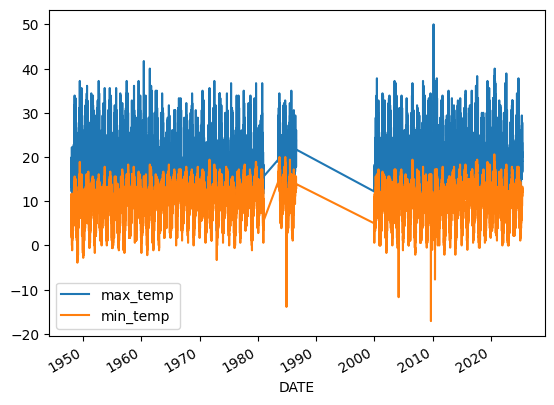

In [747]:
main_weather[["max_temp", "min_temp"]].plot()

In [748]:
main_weather.index.year.value_counts().sort_index()

DATE
1948    365
1949    365
1950    365
1951    365
1952    366
       ... 
2021    365
2022    365
2023    365
2024    366
2025    162
Name: count, Length: 63, dtype: int64

<Axes: xlabel='DATE'>

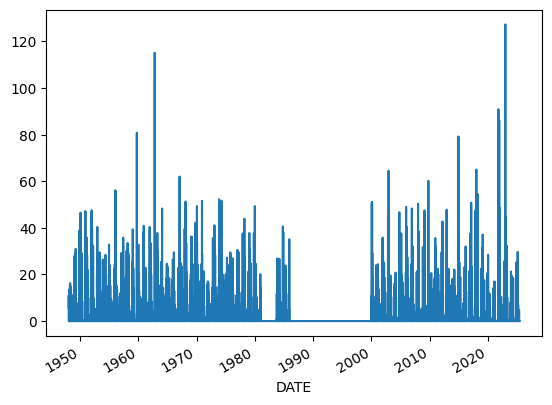

In [749]:
main_weather["precipitation"].plot()

In [750]:
main_weather.groupby(main_weather.index.year).sum()["precipitation"]

DATE
1948    368.3
1949    380.9
1950    665.2
1951    564.1
1952    565.0
        ...  
2021    529.3
2022    390.9
2023    533.0
2024    435.5
2025    115.1
Name: precipitation, Length: 63, dtype: float64

In [751]:
main_weather["target"] = main_weather["max_temp"].shift(-1)
main_weather = main_weather.iloc[:-1,:] .copy()
main_weather# Remove the last row with NaN target

,precipitation,snow,snow_depth,max_temp,min_temp,month,dayofyear,prev_precip,target
DATE,,,,,,,,,
1948-01-02,5.8,0.0,0.0,13.3,10.6,1,2,0.8,13.9
1948-01-03,0.0,0.0,0.0,13.9,9.4,1,3,5.8,16.7
1948-01-04,1.0,0.0,0.0,16.7,11.7,1,4,0.0,17.8
1948-01-05,0.0,0.0,0.0,17.8,10.0,1,5,1.0,18.3
1948-01-06,0.8,0.0,0.0,18.3,10.0,1,6,0.0,15.6
...,...,...,...,...,...,...,...,...,...
2025-06-06,0.0,0.0,0.0,20.6,13.3,6,157,0.0,18.9
2025-06-07,0.0,0.0,0.0,18.9,13.3,6,158,0.0,18.9
2025-06-08,0.0,0.0,0.0,18.9,12.8,6,159,0.0,17.2


In [752]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [753]:
predictors = ["precipitation", "prev_precip", "max_temp", "min_temp", "month", "dayofyear"]

In [754]:
train = main_weather.loc["1960-01-01":"2025-05-30"]

In [755]:

main_weather["month"] = main_weather.index.month
main_weather["dayofyear"] = main_weather.index.dayofyear
main_weather["prev_precip"] = main_weather["precipitation"].shift(1)
main_weather = main_weather.dropna().copy()

train = main_weather.loc[:"2025-05-30"]
test = main_weather.loc["2021-06-01":]



In [756]:
reg.fit(train[predictors], train["target"])

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [757]:
predictions = reg.predict(test[predictors])

In [758]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [759]:
mean_absolute_error(test["target"], predictions)

1.8287720974377961

In [760]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [761]:
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
DATE,,
2021-06-01,18.3,20.011511
2021-06-02,21.7,18.805479
2021-06-03,17.8,21.307448
2021-06-04,21.7,18.450832
2021-06-05,19.4,21.217746
...,...,...
2025-06-06,18.9,20.724693
2025-06-07,18.9,19.518660
2025-06-08,17.2,19.428918


In [762]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test["target"], predictions)
rmse = np.sqrt(mean_squared_error(test["target"], predictions))

print(f"MAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")


MAE: 1.83 °C
RMSE: 2.51 °C


<Axes: xlabel='DATE'>

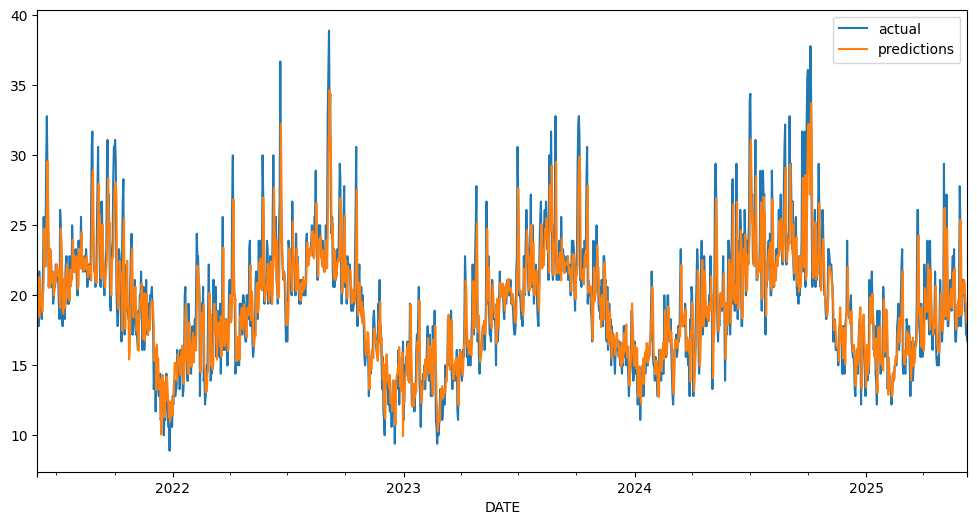

In [763]:
combined.plot(figsize=(12, 6))

In [764]:
reg.coef_

array([-3.94427690e-02, -3.03995205e-02,  7.09454664e-01,  1.79566524e-01,
        2.43097545e-02,  4.05167907e-05])

In [765]:
def create_predictions(predictions, main_weather, reg):
    train = main_weather.loc[:"2025-05-30"]
    test = main_weather.loc["2021-06-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined
    

In [766]:
main_weather["month_max"] = main_weather["max_temp"].rolling(30).mean()
main_weather

,precipitation,snow,snow_depth,max_temp,min_temp,month,dayofyear,prev_precip,target,month_max
DATE,,,,,,,,,,
1948-01-03,0.0,0.0,0.0,13.9,9.4,1,3,5.8,16.7,NaN
1948-01-04,1.0,0.0,0.0,16.7,11.7,1,4,0.0,17.8,NaN
1948-01-05,0.0,0.0,0.0,17.8,10.0,1,5,1.0,18.3,NaN
1948-01-06,0.8,0.0,0.0,18.3,10.0,1,6,0.0,15.6,NaN
1948-01-07,10.9,0.0,0.0,15.6,11.1,1,7,0.8,12.2,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-06-06,0.0,0.0,0.0,20.6,13.3,6,157,0.0,18.9,20.546667
2025-06-07,0.0,0.0,0.0,18.9,13.3,6,158,0.0,18.9,20.416667
2025-06-08,0.0,0.0,0.0,18.9,12.8,6,159,0.0,17.2,20.140000


In [767]:
main_weather["month_day_max"] = main_weather["month_max"]/ main_weather["max_temp"]
main_weather

,precipitation,snow,snow_depth,max_temp,min_temp,month,dayofyear,prev_precip,target,month_max,month_day_max
DATE,,,,,,,,,,,
1948-01-03,0.0,0.0,0.0,13.9,9.4,1,3,5.8,16.7,NaN,NaN
1948-01-04,1.0,0.0,0.0,16.7,11.7,1,4,0.0,17.8,NaN,NaN
1948-01-05,0.0,0.0,0.0,17.8,10.0,1,5,1.0,18.3,NaN,NaN
1948-01-06,0.8,0.0,0.0,18.3,10.0,1,6,0.0,15.6,NaN,NaN
1948-01-07,10.9,0.0,0.0,15.6,11.1,1,7,0.8,12.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-06,0.0,0.0,0.0,20.6,13.3,6,157,0.0,18.9,20.546667,0.997411
2025-06-07,0.0,0.0,0.0,18.9,13.3,6,158,0.0,18.9,20.416667,1.080247
2025-06-08,0.0,0.0,0.0,18.9,12.8,6,159,0.0,17.2,20.140000,1.065608


In [768]:
predictors = ["precipitation", "max_temp", "min_temp", "month_max", "month_day_max", "max_mix"]

In [769]:
main_weather = main_weather.iloc[30,:].copy()

In [770]:
error, combined = create_predictions(predictions, main_weather, reg)

KeyError: '2025-05-30'

In [771]:
"2025-05-30" in main_weather.index

False

In [779]:
main_weather

precipitation     1.800000
snow              0.000000
snow_depth        0.000000
max_temp          9.400000
min_temp          1.700000
month             2.000000
dayofyear        33.000000
prev_precip       0.000000
target           13.900000
month_max        16.013333
month_day_max     1.703546
Name: 1948-02-02 00:00:00, dtype: float64